In [10]:
import os
import sys
sys.path.append('../')
sys.path.append('../datasets')
sys.path.append('../models')
import torch
import torchvision
import torch.backends.cudnn as cudnn
import random
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from importlib import reload
from datasets.three_dim_shapes import ThreeDimShapesDataset
from datasets.small_norb import SmallNORBDataset
from datasets.seq_mnist import SequentialMNIST
from datasets.seq_mnist import SequentialMNIST_double
from datasets import seq_mnist as sm

import models.seqae as seqae
import models.base_networks as bn 
import models
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from einops import rearrange
from sklearn.metrics import r2_score
import pdb
from einops import rearrange
from utils import notebook_utils as nb
from utils import evaluations as ev



import copy

import csv
import ast
from source import yaml_utils as yu


from tqdm import tqdm

if torch.cuda.is_available():
    device = torch.device('cuda')
    cudnn.deterministic = True
    cudnn.benchmark = True
else:
    device = torch.device('cpu')
    gpu_index = -1

    
from utils import yaml_utils as yu
import yaml
rootpath = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/'
result_dir = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result'
jobdir = '/mnt/vol21/masomatics/ULASclone/jobs'

mode = 'so3'
dat_root = f"""/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/{mode}"""

playground_path = os.path.join(result_dir, '20220913_playground_model')


print(os.path.exists(playground_path))

default_file =  '20220926_default_run_mnist'
default_path = os.path.join(result_dir, default_file)

True


In [11]:
data_args = nb.load_config(default_path)['train_data']['args']
data_args['T'] = 10 

config = nb.load_config('/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221101_mnist_double_0/dim_m312')
data_args = config['train_data']['args']
print(data_args)






{'T': 3, 'backgrnd': False, 'max_T': 9, 'max_angle_velocity_ratio': [-0.5, 0.5], 'max_color_velocity_ratio': [-0.5, 0.5], 'only_use_digit4': True, 'root': '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/MNIST', 'train': True}


#  Fix pos, Pair tansition False  ** Align initial turned on for visualization

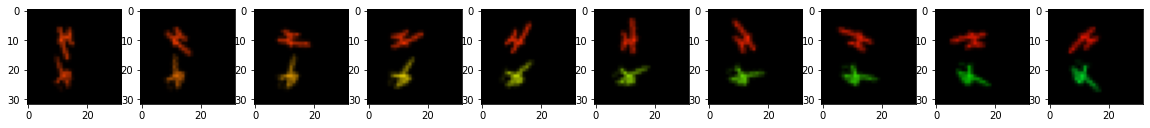

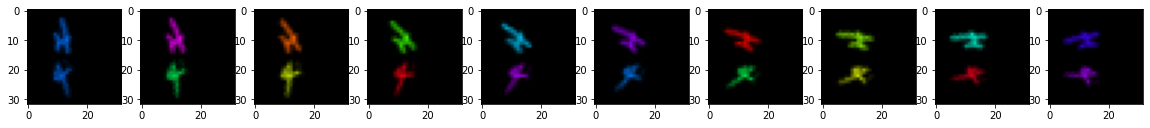

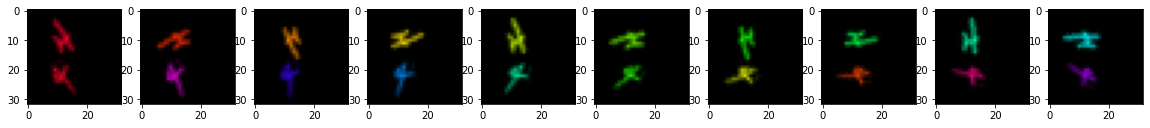

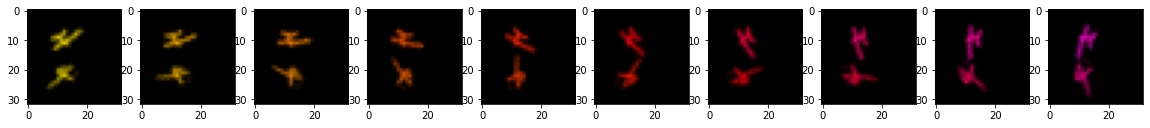

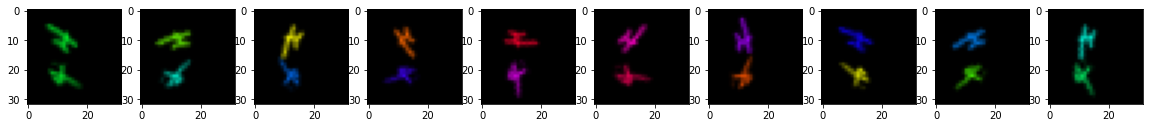

In [12]:
reload(sm)
data_args['train'] = True
data_args['T'] = 10
data_args['fixpos'] = True
data_args['pair_transition'] = False
reload(sm)
double_dat = sm.SequentialMNIST_double(same_object=True, align_initial=True,  **data_args)


size = 5
for j in range(size):
    plt.figure(figsize=(20, 20))
    datseq = double_dat[j]
    for k in range(len(datseq)):
        plt.subplot(size, len(datseq),  k+1)
        plt.imshow(torch.tensor(datseq[k]).permute([1, 2, 0])) 

# Fix pos, paor Transition True ** Align initial turned on for visualization

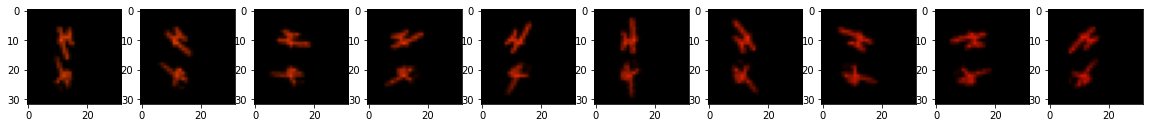

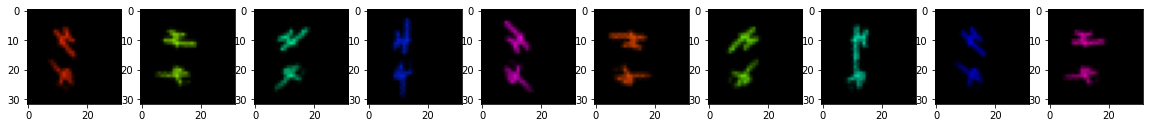

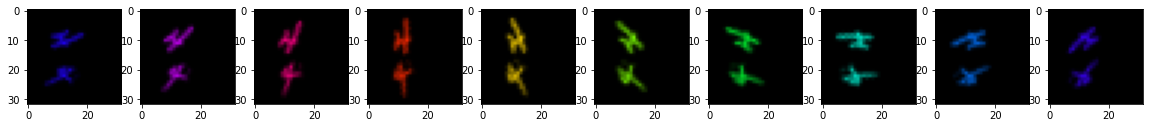

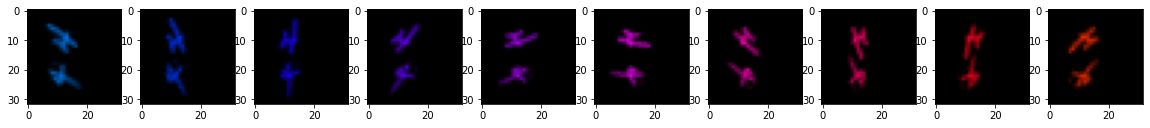

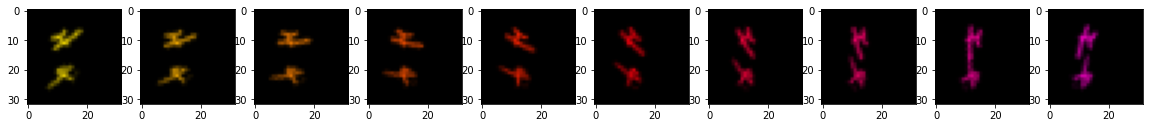

In [13]:
data_args['train'] = True
data_args['T'] = 10
data_args['fixpos'] = True
data_args['pair_transition'] = True
reload(sm)
double_dat = sm.SequentialMNIST_double(same_object=True, align_initial=True, **data_args)


size = 5
for j in range(size):
    plt.figure(figsize=(20, 20))
    datseq = double_dat[j]
    for k in range(len(datseq)):
        plt.subplot(size, len(datseq),  k+1)
        plt.imshow(torch.tensor(datseq[k]).permute([1, 2, 0])) 

# Move pos, pair Transition False ** Align initial turned on for visualization

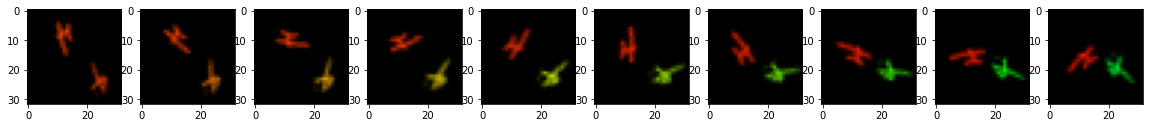

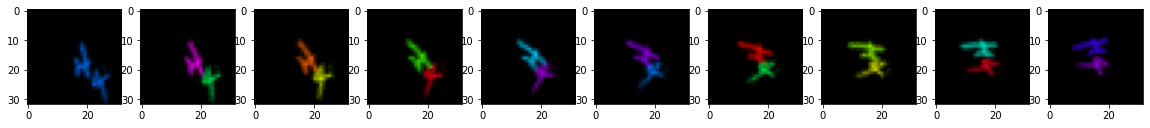

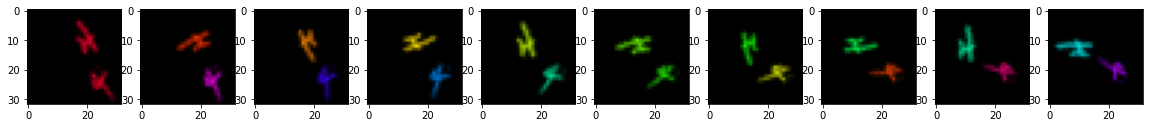

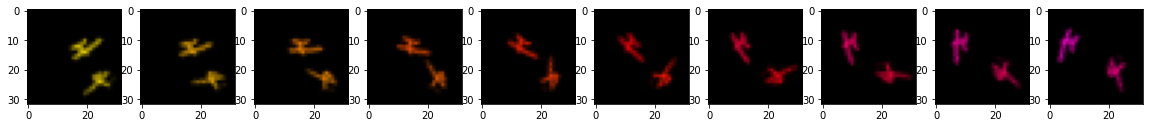

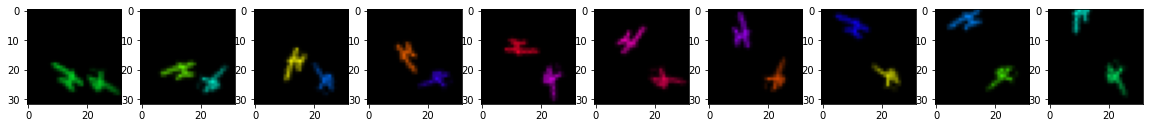

In [14]:
reload(sm)
data_args['train'] = True
data_args['T'] = 10
data_args['fixpos'] = False
data_args['pair_transition'] = False
reload(sm)
double_dat = sm.SequentialMNIST_double(same_object=True,align_initial=True,**data_args)


size = 5
for j in range(size):
    plt.figure(figsize=(20, 20))
    datseq = double_dat[j]
    for k in range(len(datseq)):
        plt.subplot(size, len(datseq),  k+1)
        plt.imshow(torch.tensor(datseq[k]).permute([1, 2, 0])) 

# Move pos, pair Transition True

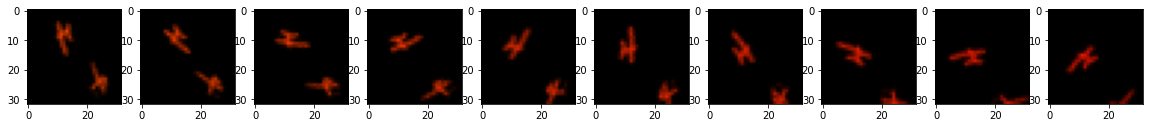

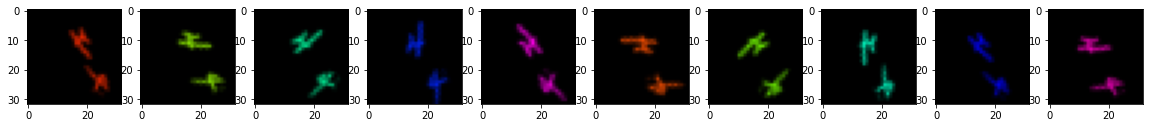

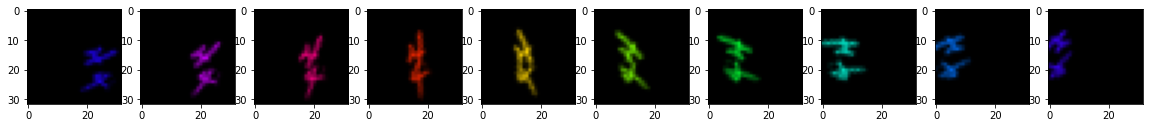

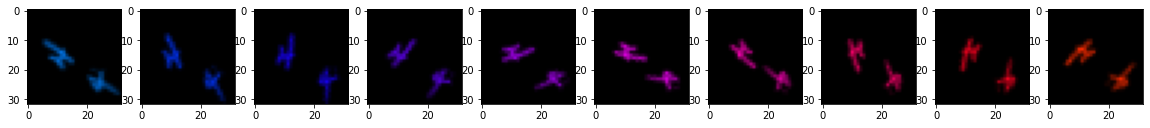

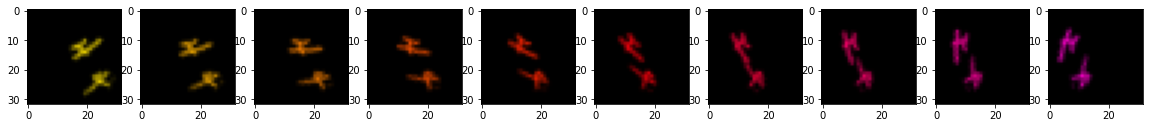

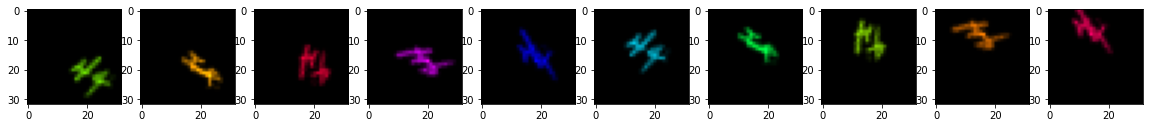

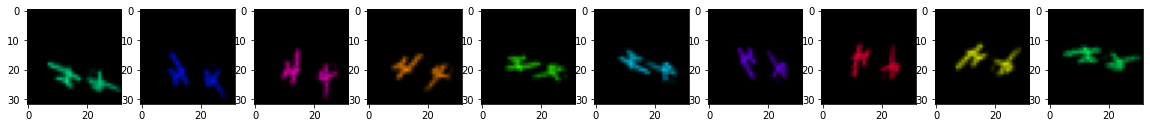

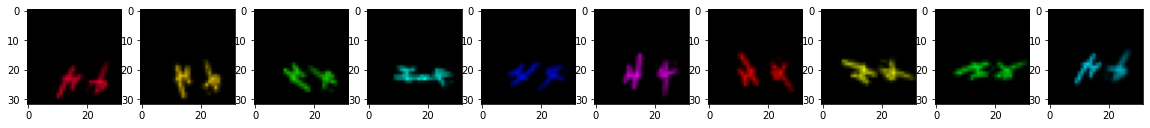

In [15]:
reload(sm)
data_args['train'] = True
data_args['T'] = 10
data_args['fixpos'] = False
data_args['pair_transition'] = True
reload(sm)
double_dat = sm.SequentialMNIST_double(same_object=True, align_initial=True, **data_args)


size = 8
for j in range(size):
    plt.figure(figsize=(20, 20))
    datseq = double_dat[j]
    for k in range(len(datseq)):
        plt.subplot(size, len(datseq),  k+1)
        plt.imshow(torch.tensor(datseq[k]).permute([1, 2, 0])) 

In [22]:
TT = 10
TTT = 32

dataconfig = {'T': TT,
 'backgrnd': False,
 'fixpos': False,
 'max_T': TT,
 'max_angle_velocity_ratio': [-0.5, 0.5],
 'max_color_velocity_ratio': [-0.5, 0.5],
 'only_use_digit4': True,
 'pair_transition': True,
 'root': '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/MNIST',
 'same_object': True,
 'train': True}

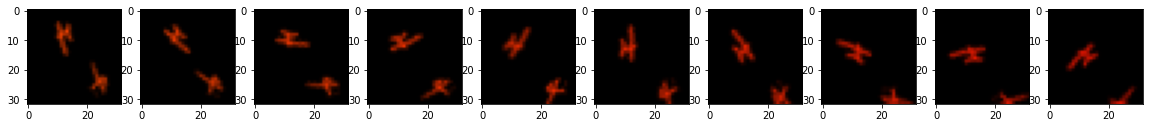

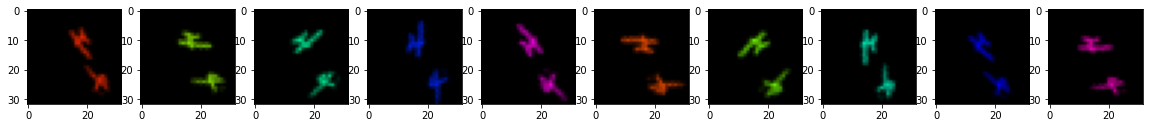

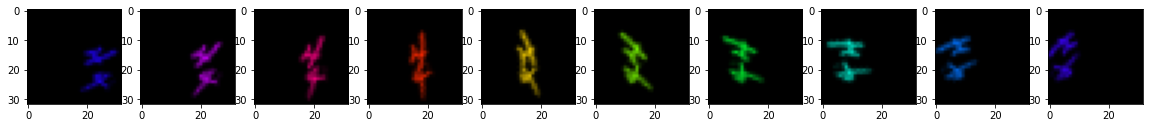

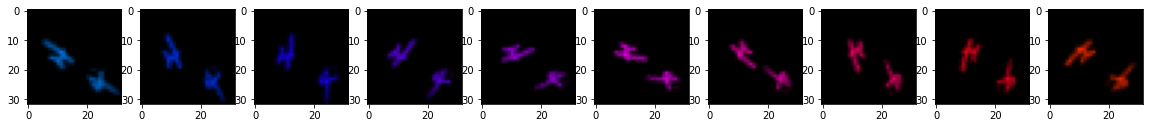

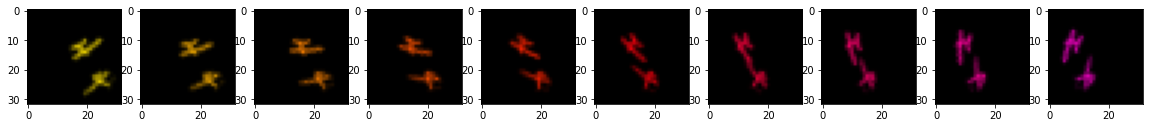

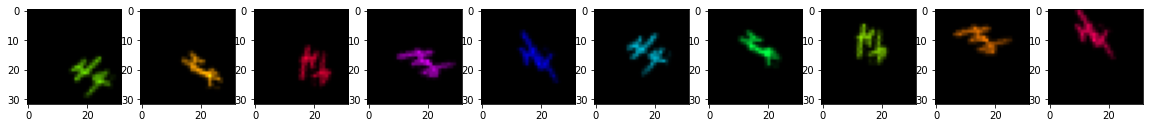

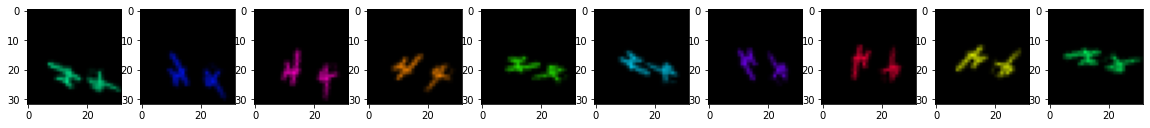

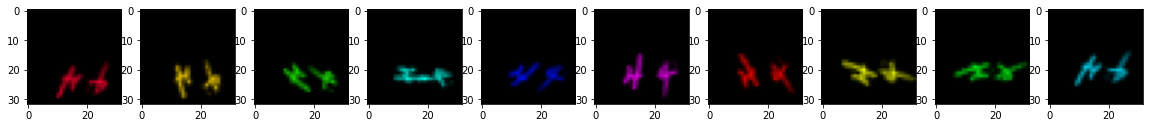

In [23]:
data_argsX = copy.deepcopy(dataconfig)

reload(sm)
data_argsX['train'] = True
data_argsX['T'] = 10
data_argsX['fixpos'] = False
data_argsX['pair_transition'] = True
reload(sm)
double_dat = sm.SequentialMNIST_double(align_initial=True, **data_argsX)


size = 8
for j in range(size):
    plt.figure(figsize=(20, 20))
    datseq = double_dat[j]
    for k in range(len(datseq)):
        plt.subplot(size, len(datseq),  k+1)
        plt.imshow(torch.tensor(datseq[k]).permute([1, 2, 0])) 

In [18]:
data_argsX

{'T': 10,
 'backgrnd': False,
 'fixpos': False,
 'max_T': 32,
 'max_angle_velocity_ratio': [-0.5, 0.5],
 'max_color_velocity_ratio': [-0.5, 0.5],
 'only_use_digit4': True,
 'pair_transition': True,
 'root': '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/MNIST',
 'same_object': True,
 'train': True}

In [20]:
data_args

{'T': 10,
 'backgrnd': False,
 'max_T': 9,
 'max_angle_velocity_ratio': [-0.5, 0.5],
 'max_color_velocity_ratio': [-0.5, 0.5],
 'only_use_digit4': True,
 'root': '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/MNIST',
 'train': True,
 'fixpos': False,
 'pair_transition': True}

In [21]:
for key in data_args.keys():
    if data_args[key] != data_argsX[key]:
        print(key)

max_T
